In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
random.seed(123)

Populating the interactive namespace from numpy and matplotlib


Column Name	Description

| Name | Description |
| --- | --- |
| fecha_dato | The table is partitioned for this column |
| ncodpers | Customer code |
|ind_empleado	| Employee index: A active, B ex employed, F filial, N not employee, P pasive |
|pais_residencia|	Customer's Country residence|
|sexo|	Customer's sex|
|age|	Age|
|fecha_alta|	The date in which the customer became as the first holder of a contract in the bank|
|ind_nuevo|	New customer Index. 1 if the customer registered in the last 6 months.|
|antiguedad|	Customer seniority (in months)|
|indrel|	1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)|
|ult_fec_cli_1t|	Last date as primary customer (if he isn't at the end of the month)|
|indrel_1mes	|Customer type at the beginning of the month ,1 (First/Primary customer), 2 (co-owner ),P (Potential),3 (former primary), 4(former co-owner)|
|tiprel_1mes	|Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential)|
|indresi	|Residence index (S (Yes) or N (No) if the residence country is the same than the bank country)|
|indext	|Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)|
|conyuemp|	Spouse index. 1 if the customer is spouse of an employee|
|canal_entrada|	channel used by the customer to join|
|indfall|	Deceased index. N/S|
|tipodom|	Addres type. 1, primary address|
|cod_prov|	Province code (customer's address)|
|nomprov|	Province name|
|ind_actividad_cliente|	Activity index (1, active customer; 0, inactive customer)|
|renta|	Gross income of the household|
|segmento|	segmentation: 01 - VIP, 02 - Individuals 03 - college graduated|
|ind_ahor_fin_ult1|	Saving Account|
|ind_aval_fin_ult1|	Guarantees|
|ind_cco_fin_ult1|	Current Accounts|
|ind_cder_fin_ult1|	Derivada Account|
|ind_cno_fin_ult1|	Payroll Account|
|ind_ctju_fin_ult1|	Junior Account|
|ind_ctma_fin_ult1|	Más particular Account|
|ind_ctop_fin_ult1|	particular Account|
|ind_ctpp_fin_ult1|	particular Plus Account|
|ind_deco_fin_ult1|	Short-term deposits|
|ind_deme_fin_ult1|	Medium-term deposits|
|ind_dela_fin_ult1|	Long-term deposits|
|ind_ecue_fin_ult1|	e-account|
|ind_fond_fin_ult1|	Funds|
|ind_hip_fin_ult1|	Mortgage|
|ind_plan_fin_ult1|	Pensions|
|ind_pres_fin_ult1|	Loans|
|ind_reca_fin_ult1|	Taxes|
|ind_tjcr_fin_ult1|	Credit Card|
|ind_valo_fin_ult1|	Securities|
|ind_viv_fin_ult1|	Home Account|
|ind_nomina_ult1|	Payroll|
|ind_nom_pens_ult1|	Pensions|
|ind_recibo_ult1|	Direct Debit|

In [2]:
from google.colab import drive
drive.mount('/content/drive')

DATA_PATH = "/content/drive/My Drive/Fall2020/Applied Machine Learning/AML Project/train_ver2.csv"

df_original = pd.read_csv(DATA_PATH,dtype={"sexo":str, "ind_nuevo":str,"ult_fec_cli_1t":str,"indext":str}, nrows=7000000)
# unique_id = pd.Series(df_original["ncodpers"].unique()).sample(n=12000)
# df_original = df_original[df_original.ncodpers.isin(unique_id)]

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
df = df_original.copy()
pd.set_option('display.max_columns', None)
df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0,6,1.0,NaN,1,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0,35,1.0,NaN,1,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0,35,1.0,NaN,1,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


### Data Cleaning

In [ ]:
# Drop Unuseful Date feature
df= df.drop(["fecha_dato","fecha_alta",'ult_fec_cli_1t'],axis = 1)

# The province name is extra because cod_prov contains the code of the province
# Besides, the name are in spanish which have unicode issues
df.drop(["nomprov"],axis=1,inplace=True)

In [ ]:
df.isnull().any()

ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
ind_nuevo                 True
antiguedad               False
indrel                    True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco_fin_ult1        False
ind_deme_fin_ult1        False
ind_dela_fin_ult1        False
ind_ecue

In [ ]:
# Convert datatypes
df["age"] = pd.to_numeric(df["age"], errors="coerce")

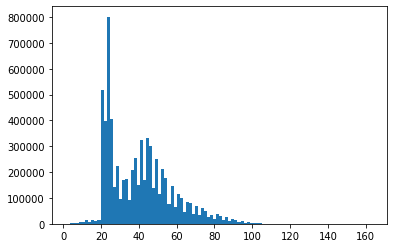

In [ ]:
plt.hist(df["age"].dropna(),bins=100)
plt.show()

In [ ]:
# Apprantly, age close to 0 and above 100 contain errors.
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    fence_low  = q1-1.5*(q3-q1)
    fence_high = q3+1.5*(q3-q1)
    a = df_in['age'].loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    print(a.sort_values())
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
df = remove_outlier(df,'age')

5629832     90.0
5430926     90.0
2963149     90.0
5430981     90.0
2962124     90.0
           ...  
3988416    126.0
6887164    163.0
5658344    163.0
5271688    163.0
4099515    163.0
Name: age, Length: 56060, dtype: float64


In [ ]:
# However still not as good because there are age close to 0, we only want those age between 15 and 80
df = df.loc[(df['age'] > 15) & (df['age'] < 80)]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


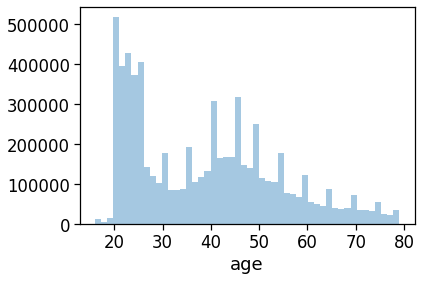

In [ ]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.distplot(df["age"].dropna(),bins=50,kde=False,)

In [ ]:
# It turns out that age which is not in the desired range help solve 
# the NA problem of many columns, the result is shown:
df.isnull().any()

ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                      True
age                      False
ind_nuevo                False
antiguedad               False
indrel                   False
indrel_1mes               True
tiprel_1mes               True
indresi                  False
indext                   False
conyuemp                  True
canal_entrada             True
indfall                  False
tipodom                  False
cod_prov                  True
ind_actividad_cliente    False
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco_fin_ult1        False
ind_deme_fin_ult1        False
ind_dela_fin_ult1        False
ind_ecue

### Drop/Fill in NA values

In [ ]:
# Province Code N/A
df.cod_prov.unique()

array([29., 13., 50., 45., 24., 20., 10., 17., 49.,  8., 37.,  9., 22.,
       31.,  5., 40., 27., 25., 28.,  3., 42., 41., 39.,  7., 47., 36.,
       46., 44., 15., 32., 23., 16., 48., 12., 26.,  2.,  6., 30., 11.,
        4., 19., 34., 35., 14., 21., 18., 33., 38., 52., 43.,  1., nan,
       51.])

In [ ]:
df.loc[df.cod_prov.isnull(),"cod_prov"] = -100.
df.cod_prov.unique()

array([  29.,   13.,   50.,   45.,   24.,   20.,   10.,   17.,   49.,
          8.,   37.,    9.,   22.,   31.,    5.,   40.,   27.,   25.,
         28.,    3.,   42.,   41.,   39.,    7.,   47.,   36.,   46.,
         44.,   15.,   32.,   23.,   16.,   48.,   12.,   26.,    2.,
          6.,   30.,   11.,    4.,   19.,   34.,   35.,   14.,   21.,
         18.,   33.,   38.,   52.,   43.,    1., -100.,   51.])

In [ ]:
# Renta ~ Gross Income
df.renta.isnull().sum()

1188669

In [ ]:
# Replace NA value by province mdedian
df['renta'] = df['renta'].fillna(df.groupby('cod_prov')['renta'].transform(lambda x: x.fillna(x.median())))

In [ ]:
#In case when the whole province renta is NA, we fill them with whole median
df.loc[df.renta.isnull(), "renta"] = df.renta.median(skipna = True)

In [ ]:
df.isnull().any()

ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                      True
age                      False
ind_nuevo                False
antiguedad               False
indrel                   False
indrel_1mes               True
tiprel_1mes               True
indresi                  False
indext                   False
conyuemp                  True
canal_entrada             True
indfall                  False
tipodom                  False
cod_prov                 False
ind_actividad_cliente    False
renta                    False
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco_fin_ult1        False
ind_deme_fin_ult1        False
ind_dela_fin_ult1        False
ind_ecue

In [ ]:
df.loc[df.indrel_1mes.isnull()]
df.indrel_1mes.isnull().sum()

76663

In [ ]:
# Deal with boolean indicator of features
# indrel_1mes
df.indrel_1mes.unique()

array([1.0, 3.0, 2.0, nan, '1.0', '1', '3', '3.0', '4.0', 'P', '4', '2.0',
       4.0, '2'], dtype=object)

In [ ]:
# Take further look into indrel_1mes NA values
df.loc[df.indrel_1mes.isnull()]

,ncodpers,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
3781457,631189,N,ES,V,42.0,1,0,1.0,NaN,NaN,S,N,NaN,NaN,N,1.0,28.0,0.0,105597.36,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3865981,565364,N,ES,H,48.0,1,0,1.0,NaN,NaN,S,N,NaN,NaN,N,1.0,8.0,1.0,118791.66,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3975350,838985,N,ES,V,49.0,1,0,1.0,NaN,NaN,S,N,NaN,NaN,N,1.0,7.0,0.0,172654.95,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3977056,843591,N,ES,V,40.0,1,2,1.0,NaN,NaN,S,S,NaN,KHM,N,1.0,28.0,1.0,113016.54,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3979448,828469,N,ES,H,48.0,1,0,1.0,NaN,NaN,S,N,NaN,NaN,N,1.0,7.0,0.0,124206.90,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6882237,76235,N,ES,V,48.0,1,0,1.0,NaN,NaN,S,N,NaN,NaN,N,1.0,29.0,0.0,94821.84,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
6914991,62870,N,ES,H,43.0,1,0,1.0,NaN,NaN,S,N,N,NaN,N,1.0,41.0,0.0,92356.56,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
6989732,806944,N,ES,H,31.0,1,0,1.0,NaN,NaN,S,N,NaN,NaN,N,1.0,28.0,1.0,139718.73,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
6991351,785704,N,ES,H,47.0,1,0,1.0,NaN,NaN,S,N,NaN,NaN,N,1.0,28.0,0.0,139718.73,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [ ]:
print(df.indrel_1mes.isnull().sum(), df.tiprel_1mes.isnull().sum())

76663 76663


In [ ]:
# Thus it is possible that entries missing indrel_1mes values also miss tiprel_1mes values
# We decide to drop NA entries to see the result
df.dropna(subset = ['indrel_1mes'],inplace = True)

In [ ]:
print(df.indrel_1mes.isnull().sum(), df.tiprel_1mes.isnull().sum())

0 0


In [ ]:
# Create a map of similar values onto the same one
indrel_1mes_dict = { 1.0 : "1", "1.0" : "1", "3.0" : "3", 3.0 : "3", 2.0 : "2", "2.0" : "2", "4.0" : "4"}
df.indrel_1mes = df.indrel_1mes.apply(lambda x: indrel_1mes_dict.get(x,x))
df.indrel_1mes = df.indrel_1mes.astype("category")

In [ ]:
df.indrel_1mes.unique()

['1', '3', '2', '4', 'P', 4]
Categories (6, object): ['1', '3', '2', '4', 'P', 4]

In [ ]:
# sexo
df.sexo.isnull().sum()

24

In [ ]:
# For sexo column, the NA number is so small so that we drop the rows. 
df.dropna(subset = ['sexo'],inplace = True)

In [ ]:
# Take further look into indrel_1mes NA values
print(df.conyuemp.isnull().sum(),
      df.canal_entrada.isnull().sum(),
      df.segmento.isnull().sum(),
      df.ind_nomina_ult1.isnull().sum(),
      df.ind_nom_pens_ult1.isnull().sum())

6640092 12582 13550 211 211


In [ ]:
df.shape

(6641082, 44)

In [ ]:
# Since we have in total 87793 rows and 87782 are NaN for conyuemp, we decide to drop the column. 
# For the rest, since the number is so small, we also decide to drop the rows. 
df.drop('conyuemp',axis = 1,inplace = True)
df.dropna(subset = ['canal_entrada','segmento','ind_nomina_ult1','ind_nom_pens_ult1'],inplace = True)

In [ ]:
df.isnull().any()

ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                     False
age                      False
ind_nuevo                False
antiguedad               False
indrel                   False
indrel_1mes              False
tiprel_1mes              False
indresi                  False
indext                   False
canal_entrada            False
indfall                  False
tipodom                  False
cod_prov                 False
ind_actividad_cliente    False
renta                    False
segmento                 False
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco_fin_ult1        False
ind_deme_fin_ult1        False
ind_dela_fin_ult1        False
ind_ecue_fin_ult1        False
ind_fond

## preliminary analysis

In [ ]:
df.head().iloc[:,:]

,ncodpers,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,1375586,N,ES,H,35.0,0,6,1.0,1,A,S,N,KHL,N,1.0,29.0,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,1050611,N,ES,V,23.0,0,35,1.0,1,I,S,S,KHE,N,1.0,13.0,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,1050612,N,ES,V,23.0,0,35,1.0,1,I,S,N,KHE,N,1.0,13.0,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,1050613,N,ES,H,22.0,0,35,1.0,1,I,S,N,KHD,N,1.0,50.0,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,1050614,N,ES,V,23.0,0,35,1.0,1,A,S,N,KHE,N,1.0,50.0,1.0,100264.05,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [ ]:
last_feature_index = 18
X = df.iloc[:,:last_feature_index+1]
y_target = df.iloc[:,last_feature_index+1:]

#convert y to categorical data
for i in y_target.columns:
    y_target[i] = y_target[i].astype('category')  
y = np.array(y_target).astype(int)

#explore the targets (products for recommendation)
sns.barplot(y_target.columns, y_target.sum(), alpha=0.8)
plt.xlabel('Bank Product')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

In [ ]:
print('\nnumeric features:')
for i in X.columns:
    if X[i].dtype == int64 or X[i].dtype == float64:
        print(i, X[i].unique())

In [ ]:
#convert categorical features to numeric bc knn accepts only numeric input
print('categorical features:')
for i in X.columns: #check the categories
    if X[i].dtype != int64 and X[i].dtype != float64:
        print(i, X[i].unique())

In [ ]:
for i in ['ind_nuevo', 'antiguedad', 'indrel_1mes']: #convert the categories represented by numbers to integers type
    X[i] = X[i].astype(int)

In [ ]:
#convert the categories to numbers
for i in X.columns: 
    if X[i].dtype != int64 and X[i].dtype != float64:
        print(i, X[i].unique())

from sklearn.preprocessing import LabelEncoder
num = LabelEncoder()
for i in ['ind_empleado', 'pais_residencia', 'sexo', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'segmento']:
    X[i] = num.fit_transform(X[i])

In [ ]:
#Descriptive statistics
X.describe()
X = X.drop(["tipodom"],axis=1) #drop tipodom bc its std=0, meaning no variation at all

In [ ]:
X.describe()

In [ ]:
sns.heatmap(X.corr())

In [ ]:
#tiprel_1mes and ind_actividad_cliente are highly negatively correlated, so drop ind_actividad_cliente (less informative)
X = X.drop(['ind_actividad_cliente'],axis=1)
#ncodpers and canal_entrada are highly positively correlated, so drop ncodpers (less informative)
X = X.drop(['ncodpers'],axis=1)
#age and [segmento, canal_entrada] are highly positively correlated, so drop segmento and canal_entrada
X = X.drop(['segmento'],axis=1)
X = X.drop(['canal_entrada'],axis=1)
#cod_prov and indresi are highly positively correlated, so drop indresi (less informative)
X = X.drop(['indresi'],axis=1)


In [ ]:
X.info()

## knn

In [ ]:
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import RandomizedSearchCV
k_range = np.arange(2,20)
param_grid = {'k':k_range}
knn = MLkNN()
knn = RandomizedSearchCV(knn, param_grid) #Reducing computational expense using RandomizedSearchCV
knn.fit(X[:20000],y[:20000])

import matplotlib.pyplot as plt
para_list = []
for j in knn.cv_results_['params']:
    for i in j.values():
       para_list.append(i)
    
print('the best #neighbors to choose and its cross validation score:', knn.best_params_, knn.best_score_)
plt.scatter(para_list, knn.cv_results_['mean_test_score'])
plt.xlabel('k: #neighbors')
plt.ylabel('mean cross validation accuracy')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y[:100000], knn.predict(X[:100000])))
#y contains 24 units (24 products for recommendation)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=22)

In [ ]:
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import RandomizedSearchCV

k_range = np.arange(2,20)
param_grid = {'k':k_range}
knn = MLkNN()
knn = RandomizedSearchCV(knn, param_grid) #Reducing computational expense using RandomizedSearchCV
knn.fit(X_train,y_train)

import matplotlib.pyplot as plt
para_list = []
for j in knn.cv_results_['params']:
    for i in j.values():
        para_list.append(i)
    
print('the best #neighbors to choose and its cross validation score:', knn.best_params_, knn.best_score_)
plt.scatter(para_list, knn.cv_results_['mean_test_score'])
plt.xlabel('k: #neighbors')
plt.ylabel('mean cross validation accuracy')